In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.getcwd()

'/content'

In [4]:
%%time
others = []

path = '/content/drive/MyDrive/Colab Notebooks/dataScreenshots_2/others'

#path = os.path.join(os.getcwd(), foldername)                    #define foldername

i = 0

for file in os.listdir(path):
    i += 1
    print(f"{file},{i}")                                   # get every file in the folder
    #print(file)
    img = cv2.imread(os.path.join(path, file))                   # load the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             # make it RGB (cv2 uses BGR)
    res = cv2.resize(gray, dsize=(150, 150))                   #resize it so all images are one size
    others.append(res) 
    if i >= 1000:                                               # number of images to load
      break

others = np.array(others)
others.shape

trees_132.jpg,1
trees_161.jpg,2
trees_207.jpg,3
trees_258.jpg,4
trees_177.jpg,5
trees_190.jpg,6
trees_157.jpg,7
trees_186.jpg,8
trees_199.jpg,9
trees_179.jpg,10
trees_126.jpg,11
trees_205.jpg,12
trees_192.jpg,13
trees_180.jpg,14
trees_202.jpg,15
trees_188.jpg,16
trees_178.jpg,17
trees_203.jpg,18
trees_182.jpg,19
trees_193.jpg,20
trees_174.jpg,21
trees_200.jpg,22
trees_184.jpg,23
trees_183.jpg,24
trees_124.jpg,25
trees_144.jpg,26
trees_168.jpg,27
trees_159.jpg,28
trees_156.jpg,29
trees_140.jpg,30
trees_162.jpg,31
trees_117.jpg,32
trees_121.jpg,33
trees_175.jpg,34
trees_155.jpg,35
trees_139.jpg,36
trees_131.jpg,37
trees_128.jpg,38
trees_151.jpg,39
trees_227.jpg,40
trees_148.jpg,41
trees_150.jpg,42
trees_127.jpg,43
trees_138.jpg,44
trees_130.jpg,45
trees_114.jpg,46
trees_134.jpg,47
trees_143.jpg,48
trees_137.jpg,49
trees_135.jpg,50
trees_141.jpg,51
trees_133.jpg,52
trees_120.jpg,53
trees_119.jpg,54
trees_160.jpg,55
trees_142.jpg,56
trees_163.jpg,57
trees_125.jpg,58
trees_145.jpg,59
trees_

In [5]:
screenshots = []

path = '/content/drive/MyDrive/Colab Notebooks/dataScreenshots_2/screenshots'

#path = os.path.join(os.getcwd(), foldername)                    #define foldername

i = 0

for file in os.listdir(path):                                   # get every file in the folder
    i += 1
    print(file,i)
    img = cv2.imread(os.path.join(path, file))                   # load the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             # make it RGB (cv2 uses BGR)
    res = cv2.resize(gray, dsize=(150, 150))                   #resize it so all images are one size
    screenshots.append(res) 
    if i >= 1000:                                               # number of images to load
      break
screenshots = np.array(screenshots)
screenshots.shape

869.jpg 1
850.jpg 2
827.jpg 3
897.jpg 4
802.jpg 5
808.jpg 6
900.jpg 7
902.jpg 8
875.jpg 9
819.jpg 10
892.jpg 11
881.jpg 12
822.jpg 13
821.jpg 14
895.jpg 15
894.jpg 16
871.jpg 17
901.jpg 18
842.jpg 19
914.jpg 20
837.jpg 21
836.jpg 22
922.jpg 23
849.jpg 24
803.jpg 25
815.jpg 26
876.jpg 27
853.jpg 28
848.jpg 29
855.jpg 30
878.jpg 31
870.jpg 32
828.jpg 33
864.jpg 34
858.jpg 35
880.jpg 36
887.jpg 37
862.jpg 38
877.jpg 39
833.jpg 40
866.jpg 41
847.jpg 42
804.jpg 43
886.jpg 44
891.jpg 45
883.jpg 46
857.jpg 47
583.jpg 48
888.jpg 49
916.jpg 50
851.jpg 51
921.jpg 52
813.jpg 53
861.jpg 54
631.jpg 55
633.jpg 56
603.jpg 57
568.jpg 58
831.jpg 59
558.jpg 60
562.jpg 61
574.jpg 62
559.jpg 63
629.jpg 64
832.jpg 65
608.jpg 66
825.jpg 67
573.jpg 68
587.jpg 69
206.jpg 70
628.jpg 71
623.jpg 72
621.jpg 73
593.jpg 74
806.jpg 75
244.jpg 76
561.jpg 77
569.jpg 78
617.jpg 79
576.jpg 80
564.jpg 81
229.jpg 82
184.jpg 83
820.jpg 84
589.jpg 85
284.jpg 86
588.jpg 87
579.jpg 88
566.jpg 89
616.jpg 90
627.jpg 91
109.jpg 

(1000, 150, 150)

In [6]:
y_others = np.array([[0] for x in range(len(others))])

y_screenshots = np.array([[1] for x in range(len(screenshots))])

In [7]:
y_screenshots.shape

(1000, 1)

In [8]:
y=np.vstack((y_others,y_screenshots))
y.shape

(2000, 1)

In [9]:
X=np.vstack((others,screenshots))
X.shape

(2000, 150, 150)

In [10]:
X_scaled = X/255.

In [11]:
X_expanded = np.expand_dims(X_scaled, axis = -1)

In [12]:
new_random_indices = np.random.permutation(len(X_expanded))
X_reshuffled = X_expanded[new_random_indices]
y_reshuffled = y[new_random_indices]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_reshuffled,y_reshuffled)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1500, 150, 150, 1), (500, 150, 150, 1), (1500, 1), (500, 1))

In [15]:
from tensorflow.keras import layers,Sequential

In [16]:
def initialize_model():
    model = Sequential()

    # Convolutional layer and maxpool layer 1
    model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=X_train[0].shape))
    model.add(layers.MaxPool2D(2,2))

    # Convolutional layer and maxpool layer 2
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPool2D(2,2))

    # Convolutional layer and maxpool layer 3
    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPool2D(4,4))

    # Convolutional layer and maxpool layer 4
    #model.add(layers.Conv2D(128,(3,3),activation='relu'))
    #model.add(layers.MaxPool2D(2,2))

    # This layer flattens the resulting image array to 1D array
    model.add(layers.Flatten())

    # Hidden layer with 512 neurons and Rectified Linear Unit activation function 
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16,activation='relu'))

    # Output layer with single neuron which gives 1 for Screenshots or 0 for others 
    #Here we use sigmoid activation function which makes our model output to lie between 0 and 1
    model.add(layers.Dense(1,activation='sigmoid'))
    # compile
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                 )
    return model

In [17]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [18]:
#steps_per_epoch = train_imagesize/batch_size
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 10, restore_best_weights = True)
history = model.fit(X_train, y_train, validation_split = 0.2,
          batch_size=32, # Too small --> no generalization. Too large --> compute slowly
          epochs=100,
          callbacks=[es],
          verbose=1
         )

Epoch 1/100
38/38 [==============================] - 3s 22ms/step - loss: 0.6768 - accuracy: 0.5833 - val_loss: 0.5663 - val_accuracy: 0.8300
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.4378 - accuracy: 0.8208 - val_loss: 0.2213 - val_accuracy: 0.9100
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.2110 - accuracy: 0.9225 - val_loss: 0.1262 - val_accuracy: 0.9500
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.1322 - accuracy: 0.9625 - val_loss: 0.1767 - val_accuracy: 0.9333
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.1870 - accuracy: 0.9250 - val_loss: 0.1311 - val_accuracy: 0.9500
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.1008 - accuracy: 0.9717 - val_loss: 0.1101 - val_accuracy: 0.9700
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0851 - accuracy: 0.9758 - val_loss: 0.1401 - val_accuracy: 0.9600
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

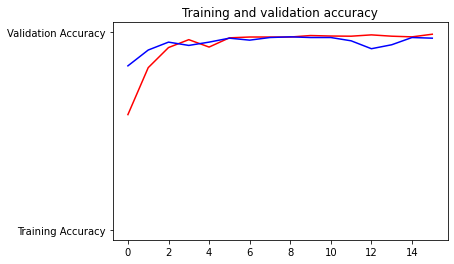

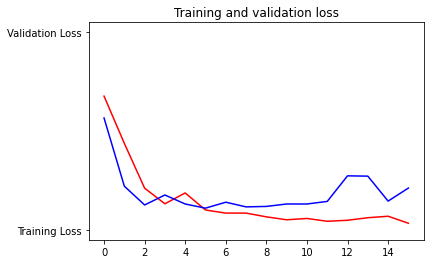

In [19]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [20]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 9ms/step - loss: 0.1037 - accuracy: 0.9660


[0.10368379950523376, 0.9660000205039978]

In [21]:
from tensorflow.keras import models

# Let's say that you have a `model`
# You can save it :
models.save_model(model, 'cnn_screenshots') # .h5 file

# and you can load it somewhere else :
loaded_model = models.load_model('cnn_screenshots')

INFO:tensorflow:Assets written to: cnn_screenshots/assets


In [22]:
X_test[1].shape

(150, 150, 1)

In [23]:
loaded_model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 5ms/step - loss: 0.1037 - accuracy: 0.9660


[0.10368379950523376, 0.9660000205039978]

In [24]:
loaded_model.predict(X_test)[1]

array([1.], dtype=float32)

In [25]:
X_test.shape,y_test.shape

((500, 150, 150, 1), (500, 1))

In [26]:
X_test.shape

(500, 150, 150, 1)

In [27]:
pred_wrong = []
def model_predict(index):
    #plt.imshow(X_test[index].reshape(150,150), cmap = 'gray')
    test = np.expand_dims(X_test[index],axis = 0)
    val = round(model.predict(test)[0][0]) # ERROR
    expected_output = y_test[index]
    if val == expected_output:
      if expected_output:
        print(f"{index}:screenshot")
      else:
        print(f"{index}:others")
    else:
        pred_wrong.append(index)
        print("\nPrediction gone wrong!!")
        if expected_output:
          print(f"{index}:screenshot\n")
        else:
          print(f"{index}:others\n")

In [29]:
len(X_test)

500

In [30]:
#range(0,499)
for i in range(len(X_test)):
  model_predict(i)

0:others
1:screenshot
2:screenshot
3:others
4:others
5:screenshot
6:screenshot
7:screenshot
8:screenshot
9:screenshot
10:screenshot
11:others
12:others
13:screenshot
14:others
15:others
16:screenshot
17:others
18:screenshot
19:others
20:screenshot
21:others
22:others
23:others
24:screenshot
25:screenshot
26:screenshot
27:others
28:screenshot
29:screenshot
30:screenshot
31:screenshot
32:others
33:others
34:screenshot
35:others
36:others
37:screenshot
38:screenshot
39:others
40:screenshot
41:others
42:screenshot
43:screenshot
44:screenshot
45:others
46:others
47:screenshot
48:others
49:others
50:others
51:screenshot
52:screenshot
53:screenshot
54:screenshot
55:others
56:screenshot
57:others
58:others
59:screenshot
60:screenshot
61:screenshot
62:others
63:others
64:others
65:others
66:screenshot
67:others
68:others
69:others
70:screenshot
71:screenshot
72:others
73:screenshot
74:others
75:screenshot
76:others
77:others
78:screenshot
79:others
80:others
81:others
82:others
83:others
84:scr

In [31]:
model.predict(np.expand_dims(X_test[0],axis = 0))

array([[0.00116597]], dtype=float32)

In [32]:
model.predict(X_test[[0]])

array([[0.00116597]], dtype=float32)

In [33]:
len(pred_wrong)

17

100:screenshot


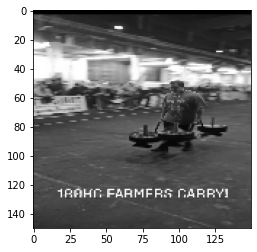

116:screenshot


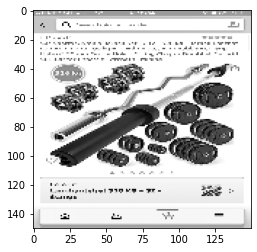

212:screenshot


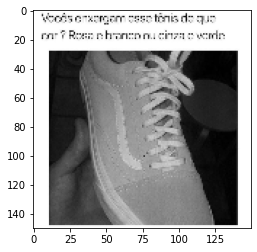

269:screenshot


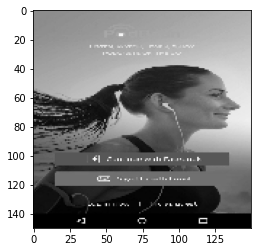

278:others


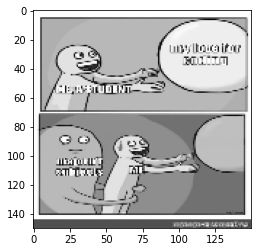

319:others


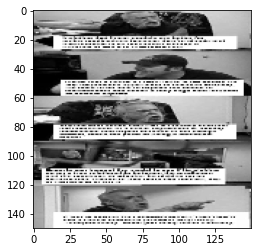

320:screenshot


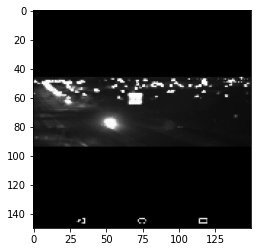

325:screenshot


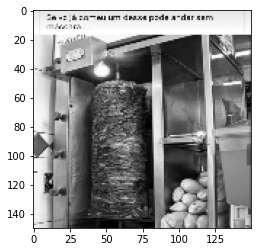

367:screenshot


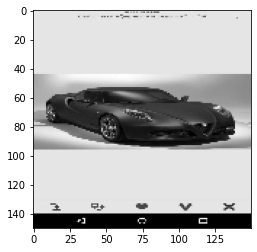

383:others


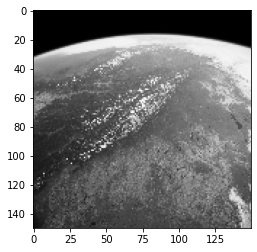

392:others


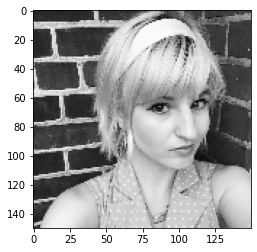

413:screenshot


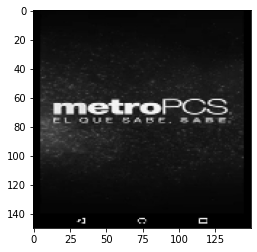

416:screenshot


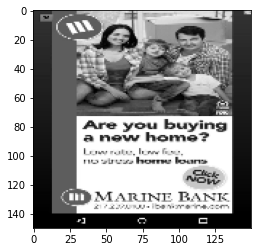

417:screenshot


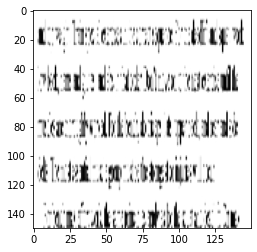

440:others


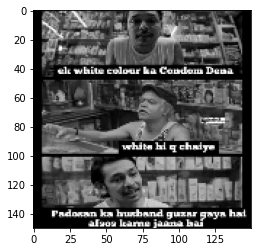

448:screenshot


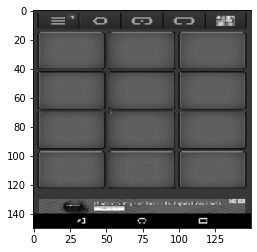

449:others


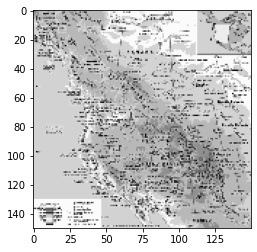

In [34]:
for i in pred_wrong:
  if y_test[i]:
    print(f"{i}:screenshot")
  else:
    print(f"{i}:others")
  plt.imshow(X_test[i].reshape(150,150), cmap = 'gray')
  plt.show()